<a href="https://colab.research.google.com/github/anishmahapatra/amazon-customer-review-nlp/blob/main/NLP_Amazon_Customer_Review_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP): Consumer Reviews of Amazon Products

*Date: 01st May, 2020 <br/>
Author: AM, PQ* 

Welcome to this Collaboratory Notebook. We shall use this notebook to the Fundamentals of the Natural Language Processing (NLP). Remember, the best way to learn Data Science is to simply <b>do it.</b> Crack your fingers, it's going to be a fun notebook. 

<b>Aim:</b> <br/>The purpose of this notebook is to understand the fundamentals of Natural Language Processing [Consumer Reviews of Amazon Products](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products).

The Lending Club Dataset has been pulled from the LendingClub Website. The level of the Data is at a <b>Customer Id</b> Level.



<a name="0"></a>
## Table of Contents

1 [Understanding the Data](#1) <br/>
2 [Processing](#2) <br/>
3 [Spacy](#3) <br/>
4 [Word2Vec](#4) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.1 [](#5.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2 [](#5.1) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.3 [](#6) <br/>
5 [NGram](#7) <br/>

<a name="1"></a>
## 1 Understanding the Dataset
Back to [Table of Contents](#0)

---

For this section, we shall install do the following:
- Install the required packages
- Import the required packages
- Read the Zomato data onto [Google Colab](https://research.google.com/colaboratory/faq.html) from a [GitHub Repository](https://www.youtube.com/watch?v=w3jLJU7DT5E)
- Read the Amazon Dataset onto Google Colab


In [10]:
# Installing the required packages

! pip uninstall -y pandas-profiling &> /dev/null                # Package for pandas profiling - visualization
! pip install pandas-profiling[notebook,html] &> /dev/null      # Uninstalling and reinstalling it due to a bug in Google Colab
! pip install sweetviz &> /dev/null                             # Package for some sweet visualizations
! pip install -U dataprep &> /dev/null                          # Package for instant data preparation
! pip install --upgrade plotly &> /dev/null                     # Updating plotly to the latest version
! pip install jupyter-dash &> /dev/null                         # Installing jupyter-dash 
! python -m spacy download en_core_web_lg &> /dev/null          # Download for spacy language pac

In [11]:
# Let us import the required packages

from dash.dependencies import Input, Output
from pandas_profiling import ProfileReport          # Pandas Profile to visualize the data
from dataprep.eda import plot_correlation           # Importing a package to visualize data correlation
from dataprep.eda import plot_missing               # Importing packge to plot the missing values of the dataset
from jupyter_dash import JupyterDash                # Importing Jupter Dash to use visualization components 

from IPython.display import display                 # Displaying widgets
import dash_html_components as html                 # To leverage html components in the visualization
import dash_core_components as dcc                  # Importing dash core components for visualization
import matplotlib.ticker as ticker                  # User-defined function for formatting graphs
import plotly.graph_objects as go                   # To use graph objects within visualizations

from plotly.offline import iplot                    # Used for interactive plots
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization
from dataprep.eda import plot                       # Importing package to plot/ visualize features of the dataset
import ipywidgets as widgets                        # Creating widgets
import plotly.express as px                         # Importing plotly express for visualizations
import matplotlib.cm as cm                          # Colormaps, colormaps handling utilities

import pandas_profiling                             # Automatic EDA
import sweetviz as sv                               # Importing sweetviz for some sweet visualizations
import seaborn as sns                               # Importing seaborn for visualization
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
%matplotlib inline    
import warnings                                     # Importing package to toggle warnings
import IPython                                      # Importing ipython for displaying html files in the notebook

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Hide Warnings
warnings.filterwarnings('ignore')

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from textwrap import wrap
import collections
import string
import spacy
import nltk
import re
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
nlp = spacy.load('en_core_web_lg')

In [15]:
# Reading the file onto Google Colab from GitHub using pandas library
reviewDf = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/amazon-customer-review-nlp/main/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv") 

In [16]:
# Viewing the shape of the data
reviewDf.shape

(28332, 9)

In [17]:
# Viewing the top 5 rows of the dataset
reviewDf.head(3)

name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand primaryCategories reviews.doRecommend  reviews.numHelpful  \
0  Amazonbasics   Health & Beauty                 NaN                 NaN   
1  Amazonbasics   Health & Beauty                 NaN                 NaN   
2  Amazonbasics   Health & Beauty                 NaN                 NaN   

   reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   

                                       reviews.title  
0  ... 3 of them and one of the item is bad quali...  
1  ... always the less expensive way to go for pr...  
2  ... are not Duracell but for the price i am ha...

From the above, we understand that the table has data on the consumer data from amazon such as name, category, brand and review information such as date, purchase information, rating, city and username



In [18]:
# Let's view a summary of the dataset now
print(reviewDf.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 28332 non-null  object 
 1   asins                28332 non-null  object 
 2   brand                28332 non-null  object 
 3   primaryCategories    28332 non-null  object 
 4   reviews.doRecommend  16086 non-null  object 
 5   reviews.numHelpful   16115 non-null  float64
 6   reviews.rating       28332 non-null  int64  
 7   reviews.text         28332 non-null  object 
 8   reviews.title        28332 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB
None


The data set has the following:
- 6 variables of type float
- 16 categorical variables
- 34660 rows
- 21 columns

In [19]:
# Printing all the columns with atleast one null value
reviewDf.columns[reviewDf.isna().any()].tolist()

['reviews.doRecommend', 'reviews.numHelpful']

There are 14 columns out of the 21 that have missing values

<a name="1.1"></a>
### 1.1 Exploratory Data Analysis (EDA)
Back to [Table of Contents](#0)

Now that we have some basic data understanding of the data we are dealing with, it's time to try and understand things a little more in details. We will proceed to <b>analyze and explore the data</b>. There is a common term in the Data Science community that we use to describe this: <u>Exploratory Data Analysis</u> (<b>[EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)</b>).</n>


Exploratory Data Analysis is used to get a <i>feel</i> of the data. We use it to understand the attributes, gaps and behaviour that the data has. A traditional way of doing it can be looking at the data column by column, row by row. As more developers contribute to the open-source python ecosystem, we have great packages that can help us analyze the data with minimal effort.


<a name="1.1.1"></a>
#### 1.1.1 Pandas Profiling
---

Back to [Table of Contents](#0)

The [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) package is used to generate profile report from a pandas dataframe. It gives column statistics on all of the columns in an interactive format that you can find below.

Since we have one primary dataset, let us make a copy of the dataset as *df* to be able to reuse the code later for any general dataset as well.

In [20]:
# Making a copy of the dataset as df
df = reviewDf.copy(deep = True)

In [21]:
# Generating the profile report and feeding it into a variable
reviewPandasProfile = ProfileReport(df, title = 'Amazon Consumer Review Data: Pandas Profiling Report', html = {'style':{'full_width':True}})

In [22]:
# Showcasing the Pandas Profiling Report for the Zomato Dataset
reviewPandasProfile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a name="1.1.2"></a>
#### 1.1.2 Sweetviz

Back to [Table of Contents](#0)

The [SweetViz](https://pypi.org/project/sweetviz/) package is a pandas-based library to visualize and compare datsets. <br/>
It is used for in-depth EDA to generate beautiful, high-density visualizations. 

In [23]:
# We shall use the SweetViz analyze() function to generate a shareable .html file to analyze the dataset
analyze_report = sv.analyze(df)
analyze_report.show_html('SweetViz.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report SweetViz.html was generated.



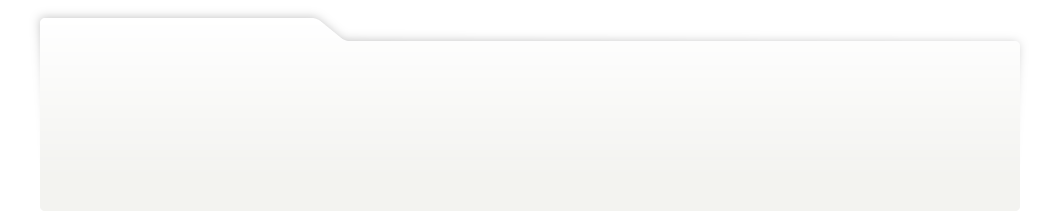
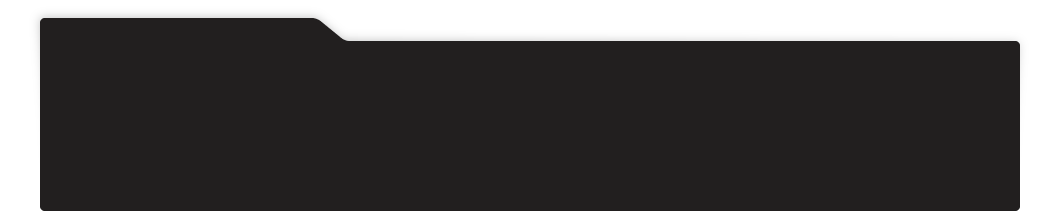
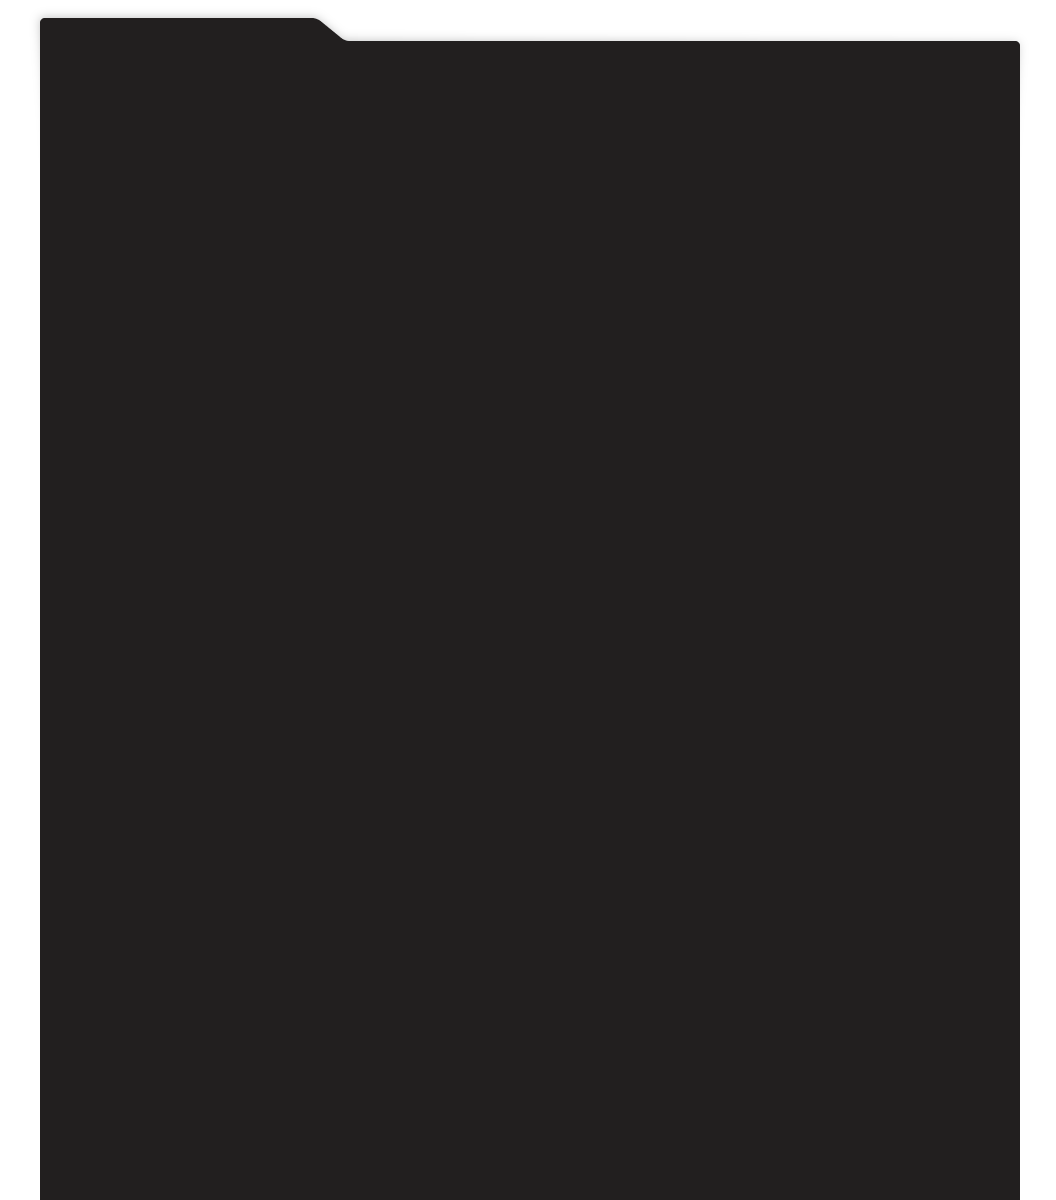
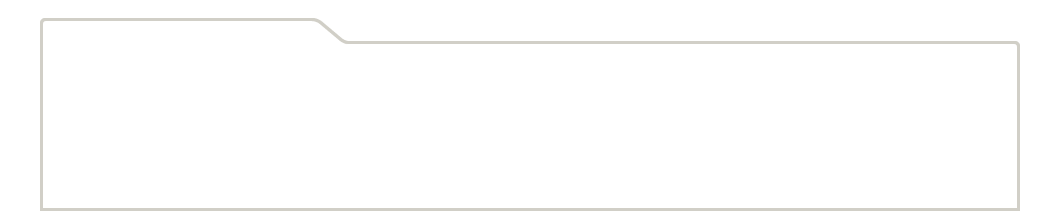
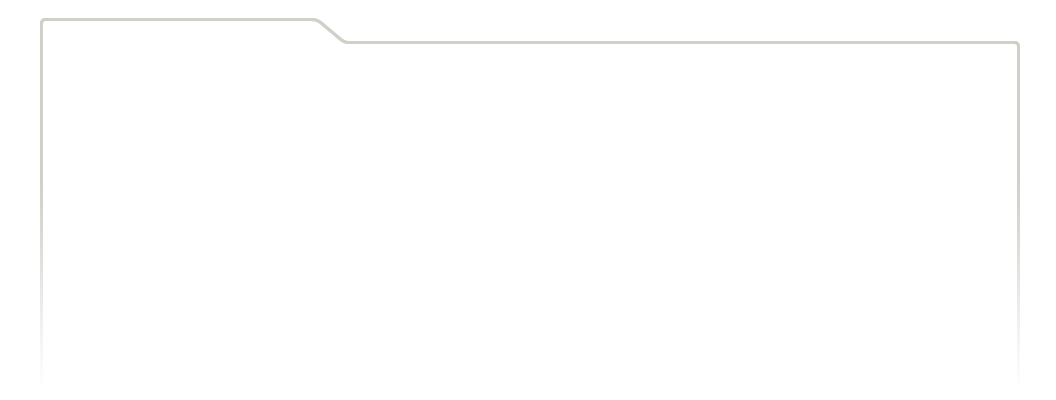
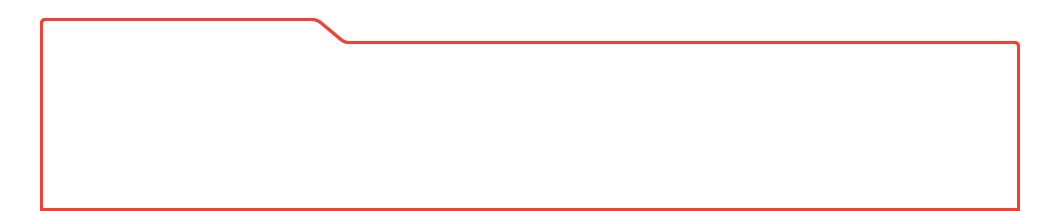
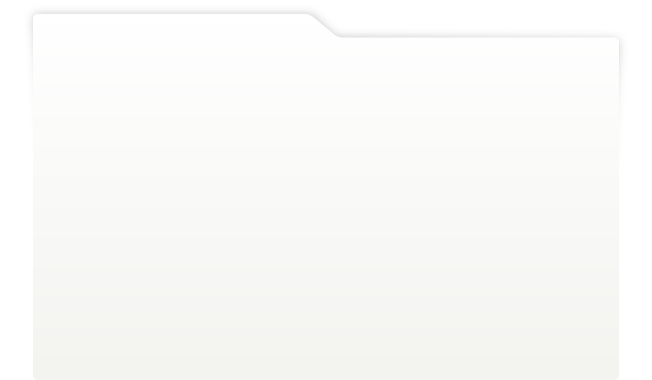
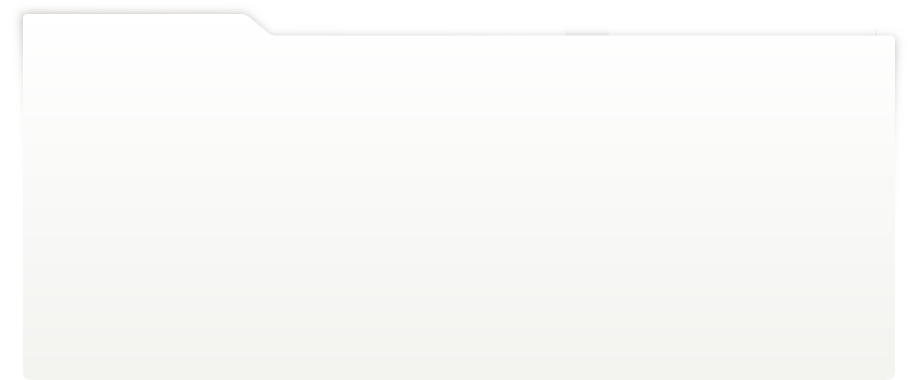
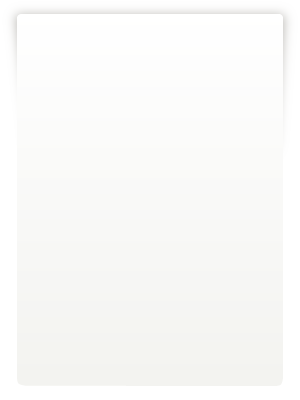
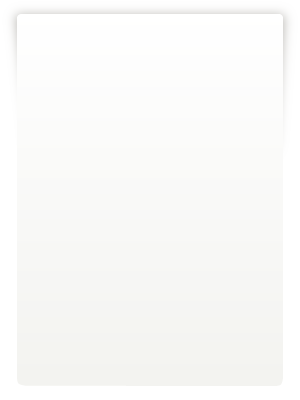
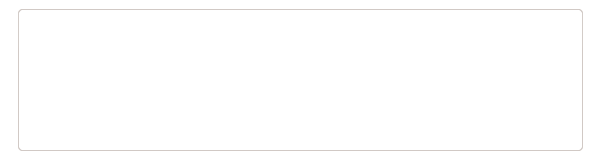
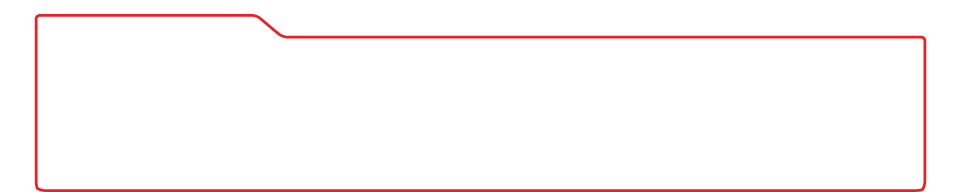
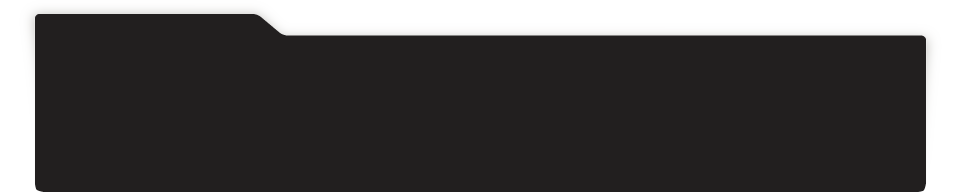
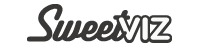
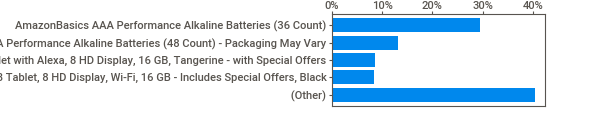
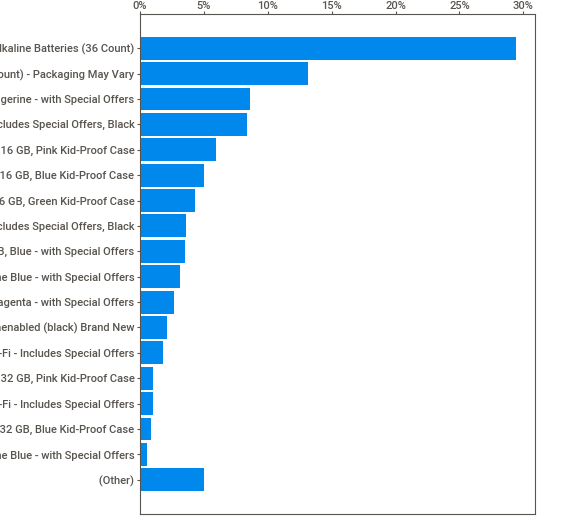
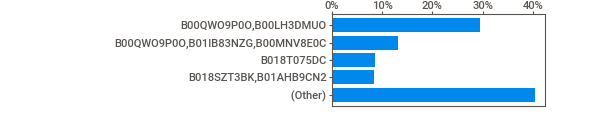
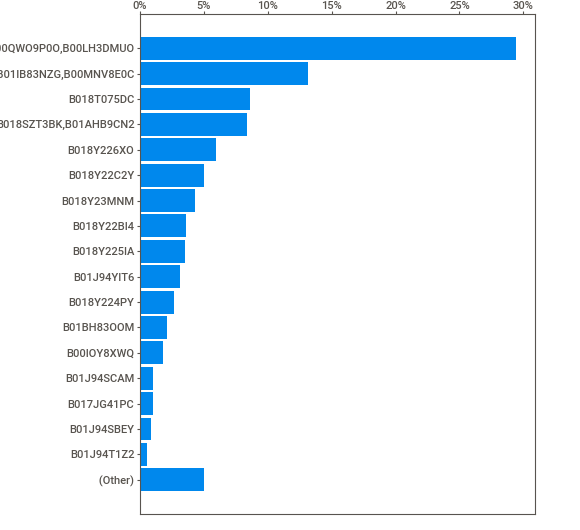
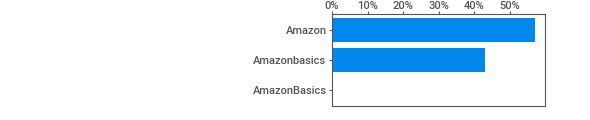
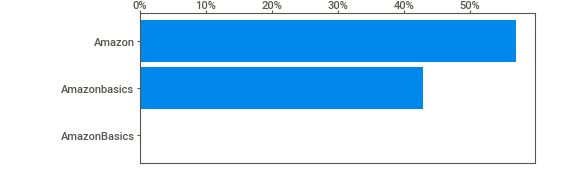
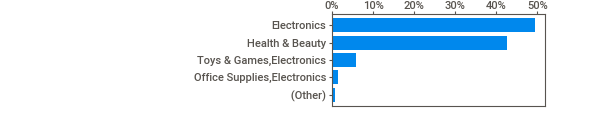
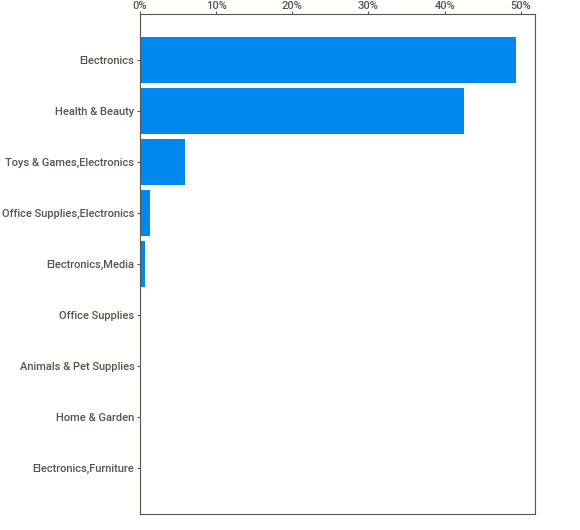
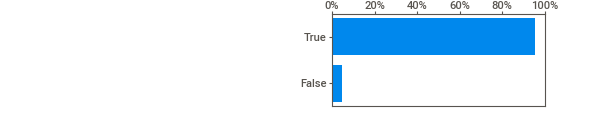
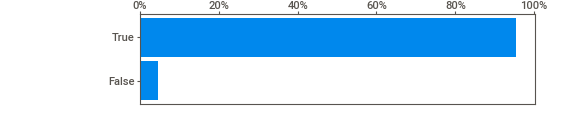
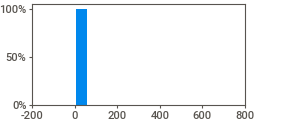
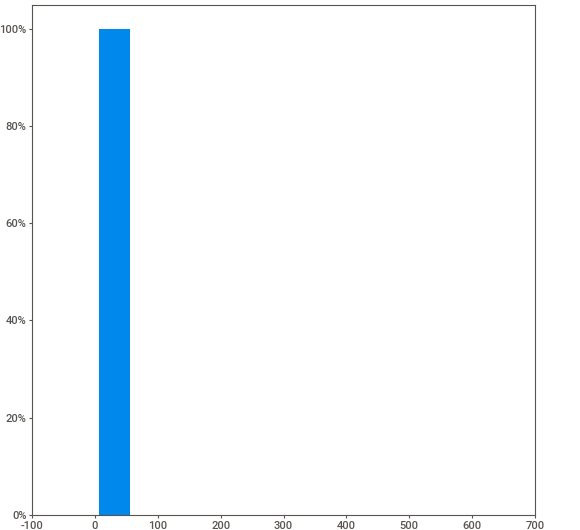
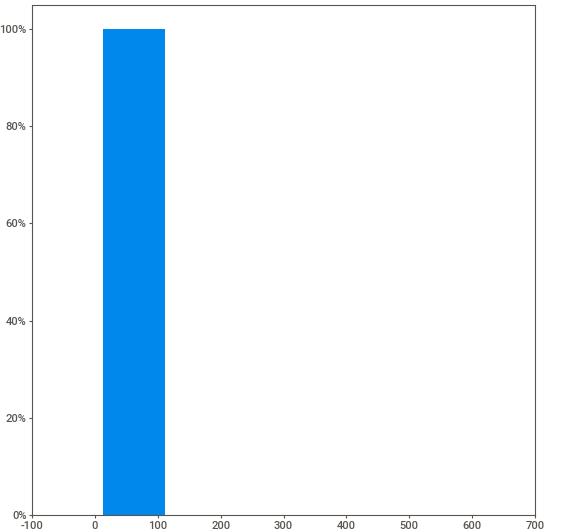
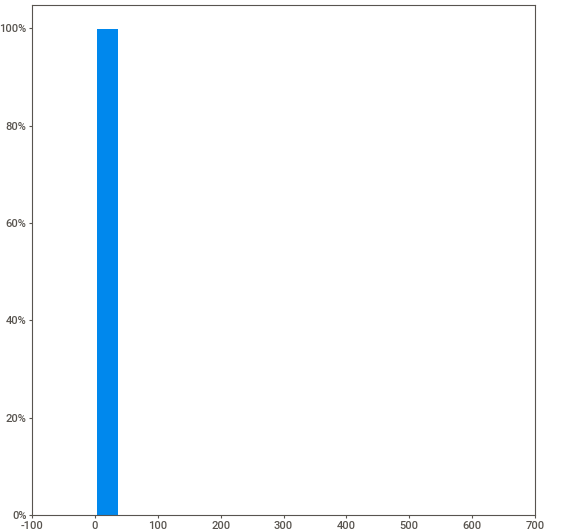
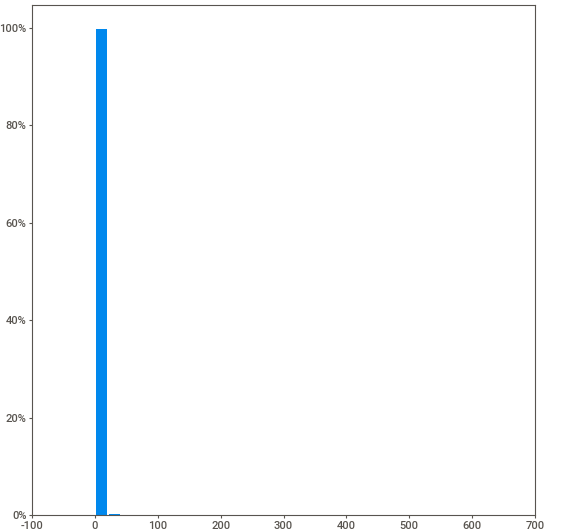
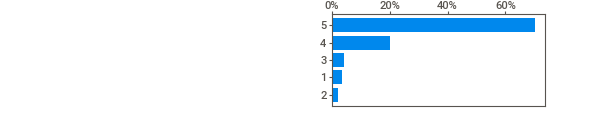
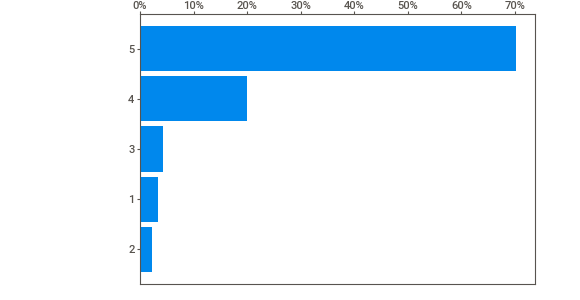
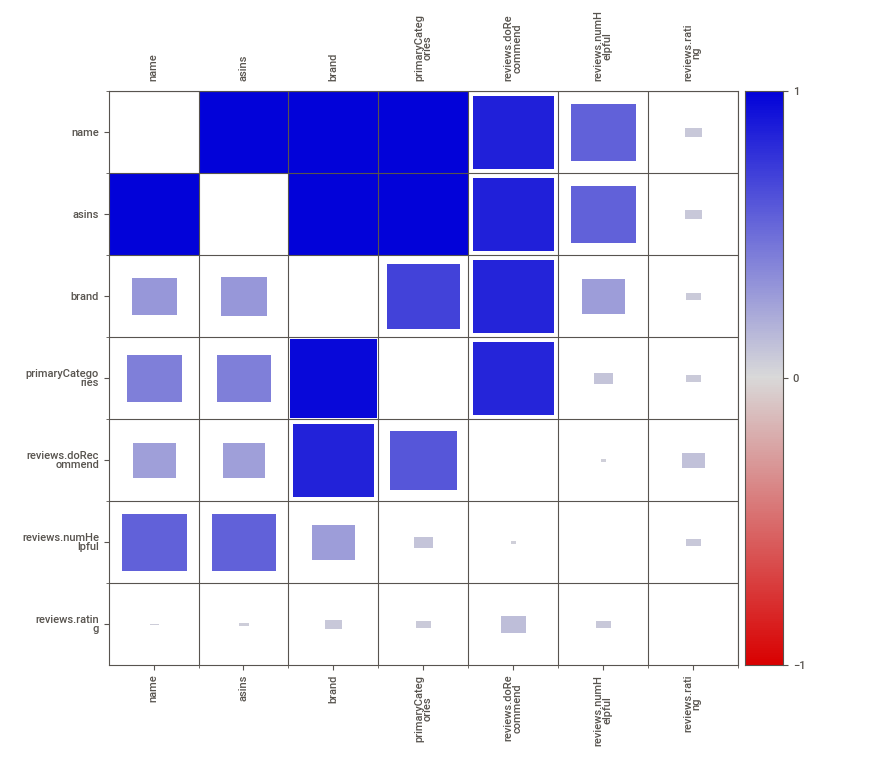
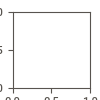

In [24]:
# Displaying the html file in the Google Colab notebook
IPython.display.HTML('SweetViz.html')

From the above EDA, we understand the following:
- reviews.didPurchase, reviews.Id, reviews.userCity, reviews.userProvince
- Name has 20% missing values
- reviews.dateAdded has 31% values missing

<a name="2"></a>
## 2 Data Processing
Back to [Table of Contents](#0)

---


In [25]:
df = reviewDf.copy(deep=True)

In [26]:
def print_info(data):
    tmp = []
    for col in data.columns:
        tmp.append([col, type(data[col][0]), data[col].isnull().sum(), data[col].nunique()])

    df = pd.DataFrame(data=tmp, columns=['column_name','Datatype', 'null_count', 'unique_count'])
    df.insert(2,'non_null_count', len(data)-df['null_count'])
    return df

In [27]:
#dataset info

print_info(df)

column_name                 Datatype  non_null_count  null_count  \
0                 name            <class 'str'>           28332           0   
1                asins            <class 'str'>           28332           0   
2                brand            <class 'str'>           28332           0   
3    primaryCategories            <class 'str'>           28332           0   
4  reviews.doRecommend          <class 'float'>           16086       12246   
5   reviews.numHelpful  <class 'numpy.float64'>           16115       12217   
6       reviews.rating    <class 'numpy.int64'>           28332           0   
7         reviews.text            <class 'str'>           28332           0   
8        reviews.title            <class 'str'>           28332           0   

   unique_count  
0            65  
1            65  
2             3  
3             9  
4             2  
5            61  
6             5  
7         18168  
8         10441

In [28]:
features = ['name','asins', 'brand', 'primaryCategories', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.title', 'reviews.text']

In [29]:
dataDf = df[features].copy()

dataDf.dropna(inplace=True)
dataDf.reset_index(inplace=True)

In [30]:
print_info(dataDf)

column_name                 Datatype  non_null_count  null_count  \
0                index    <class 'numpy.int64'>           16086           0   
1                 name            <class 'str'>           16086           0   
2                asins            <class 'str'>           16086           0   
3                brand            <class 'str'>           16086           0   
4    primaryCategories            <class 'str'>           16086           0   
5  reviews.doRecommend           <class 'bool'>           16086           0   
6   reviews.numHelpful  <class 'numpy.float64'>           16086           0   
7       reviews.rating    <class 'numpy.int64'>           16086           0   
8        reviews.title            <class 'str'>           16086           0   
9         reviews.text            <class 'str'>           16086           0   

   unique_count  
0         16086  
1            35  
2            35  
3             1  
4             5  
5             2  
6            50  
7             5  
8          5896  
9          9120

In [31]:
dataDf.head()

index                                               name       asins  \
0   8350                         Echo Spot Pair Kit (Black)  B073SQYXTW   
1   8351                         Echo Spot Pair Kit (Black)  B073SQYXTW   
2  12167  Amazon 9W PowerFast Official OEM USB Charger a...  B00QFQRELG   
3  12168  Amazon 9W PowerFast Official OEM USB Charger a...  B00QFQRELG   
4  12169  Amazon 9W PowerFast Official OEM USB Charger a...  B00QFQRELG   

    brand primaryCategories reviews.doRecommend  reviews.numHelpful  \
0  Amazon       Electronics                True                 0.0   
1  Amazon       Electronics                True                 0.0   
2  Amazon       Electronics                True                 0.0   
3  Amazon       Electronics                True                 2.0   
4  Amazon       Electronics                True                 0.0   

   reviews.rating                      reviews.title  \
0               4  ALEXA ENABLED DEVICE WITH SCREEN.   
1               5              Gotta have this one!!   
2               5                          A charger   
3               5      amazon power fast usb charger   
4               5      Amazon powerfast wall charger   

                                        reviews.text  
0  ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...  
1  I wasn't sure I even wanted this item, but cau...  
2  It seems to work just like any other usb plug ...  
3  got this for my kindle 7 tablet . Does an exce...  
4  Best kindle charger ever. Took 30 minutes to b...

data_df = dataDf <br/>
data1 = df

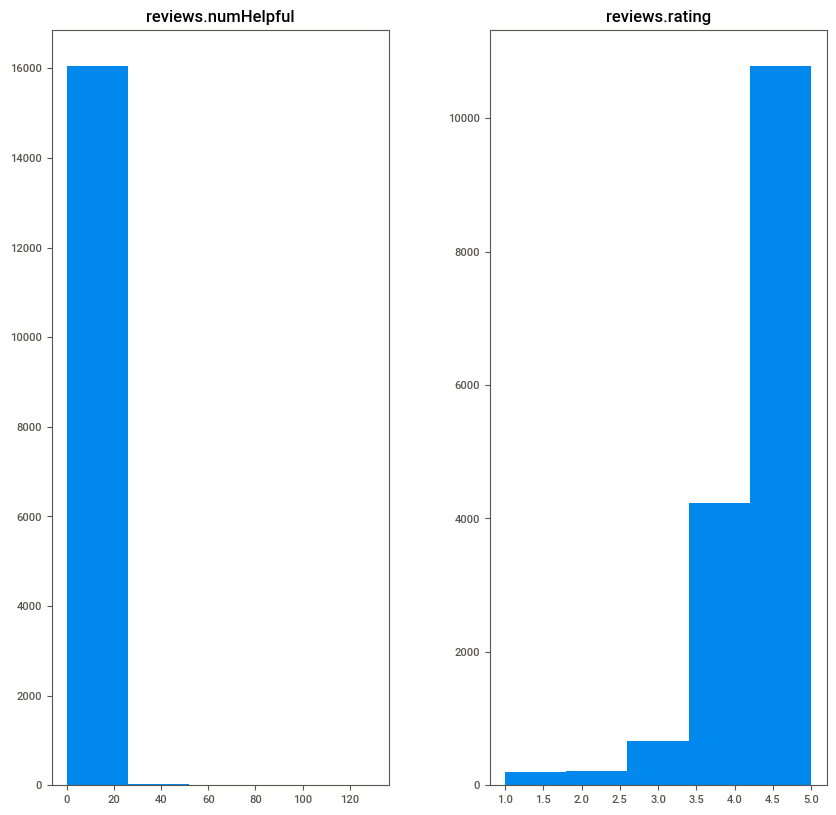

In [32]:
plot_features = ['reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating']

plot = dataDf[plot_features].hist(figsize = (10,10), grid=False, bins=5)

We will now proceed to process and standardize the data, we will do the following:
- Make the review titles & text lowercase


In [33]:
#Data preprocessing

dataDf['reviews.title'] = dataDf['reviews.title'].apply(lambda x: str(x).lower())
dataDf['reviews.title'] = dataDf['reviews.title'].apply(lambda x: re.sub('\w*\d\w*','', x))

dataDf['reviews.text'] = dataDf['reviews.text'].apply(lambda x: str(x).lower())
dataDf['reviews.text'] = dataDf['reviews.text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [34]:
dataDf['reviews.text'] = dataDf['reviews.text'].apply(lambda x: ' '.join([w for w in x.split(' ') if (w not in STOPWORDS)]))

In [35]:
dataDf['reviews.text'].head(10)

0    aside fact screen small, great little device. ...
1    sure even wanted item, caught excitement surro...
2                    seems work like usb plug charger.
3    got kindle  tablet . excellent job charging ki...
4    best kindle charger ever. took  minutes kindle...
5    looking everywhere lost charger fire stick fin...
6    line store elder women trying return amazon ta...
7    quickly charges kindle son use it. worked grea...
8    bought package said fast charger find charges ...
9                  bought charger kindle voyage great.
Name: reviews.text, dtype: object

In [36]:
corpus=[]
corpus = [w for s in dataDf['reviews.text'].str.split().values.tolist() for w in s]

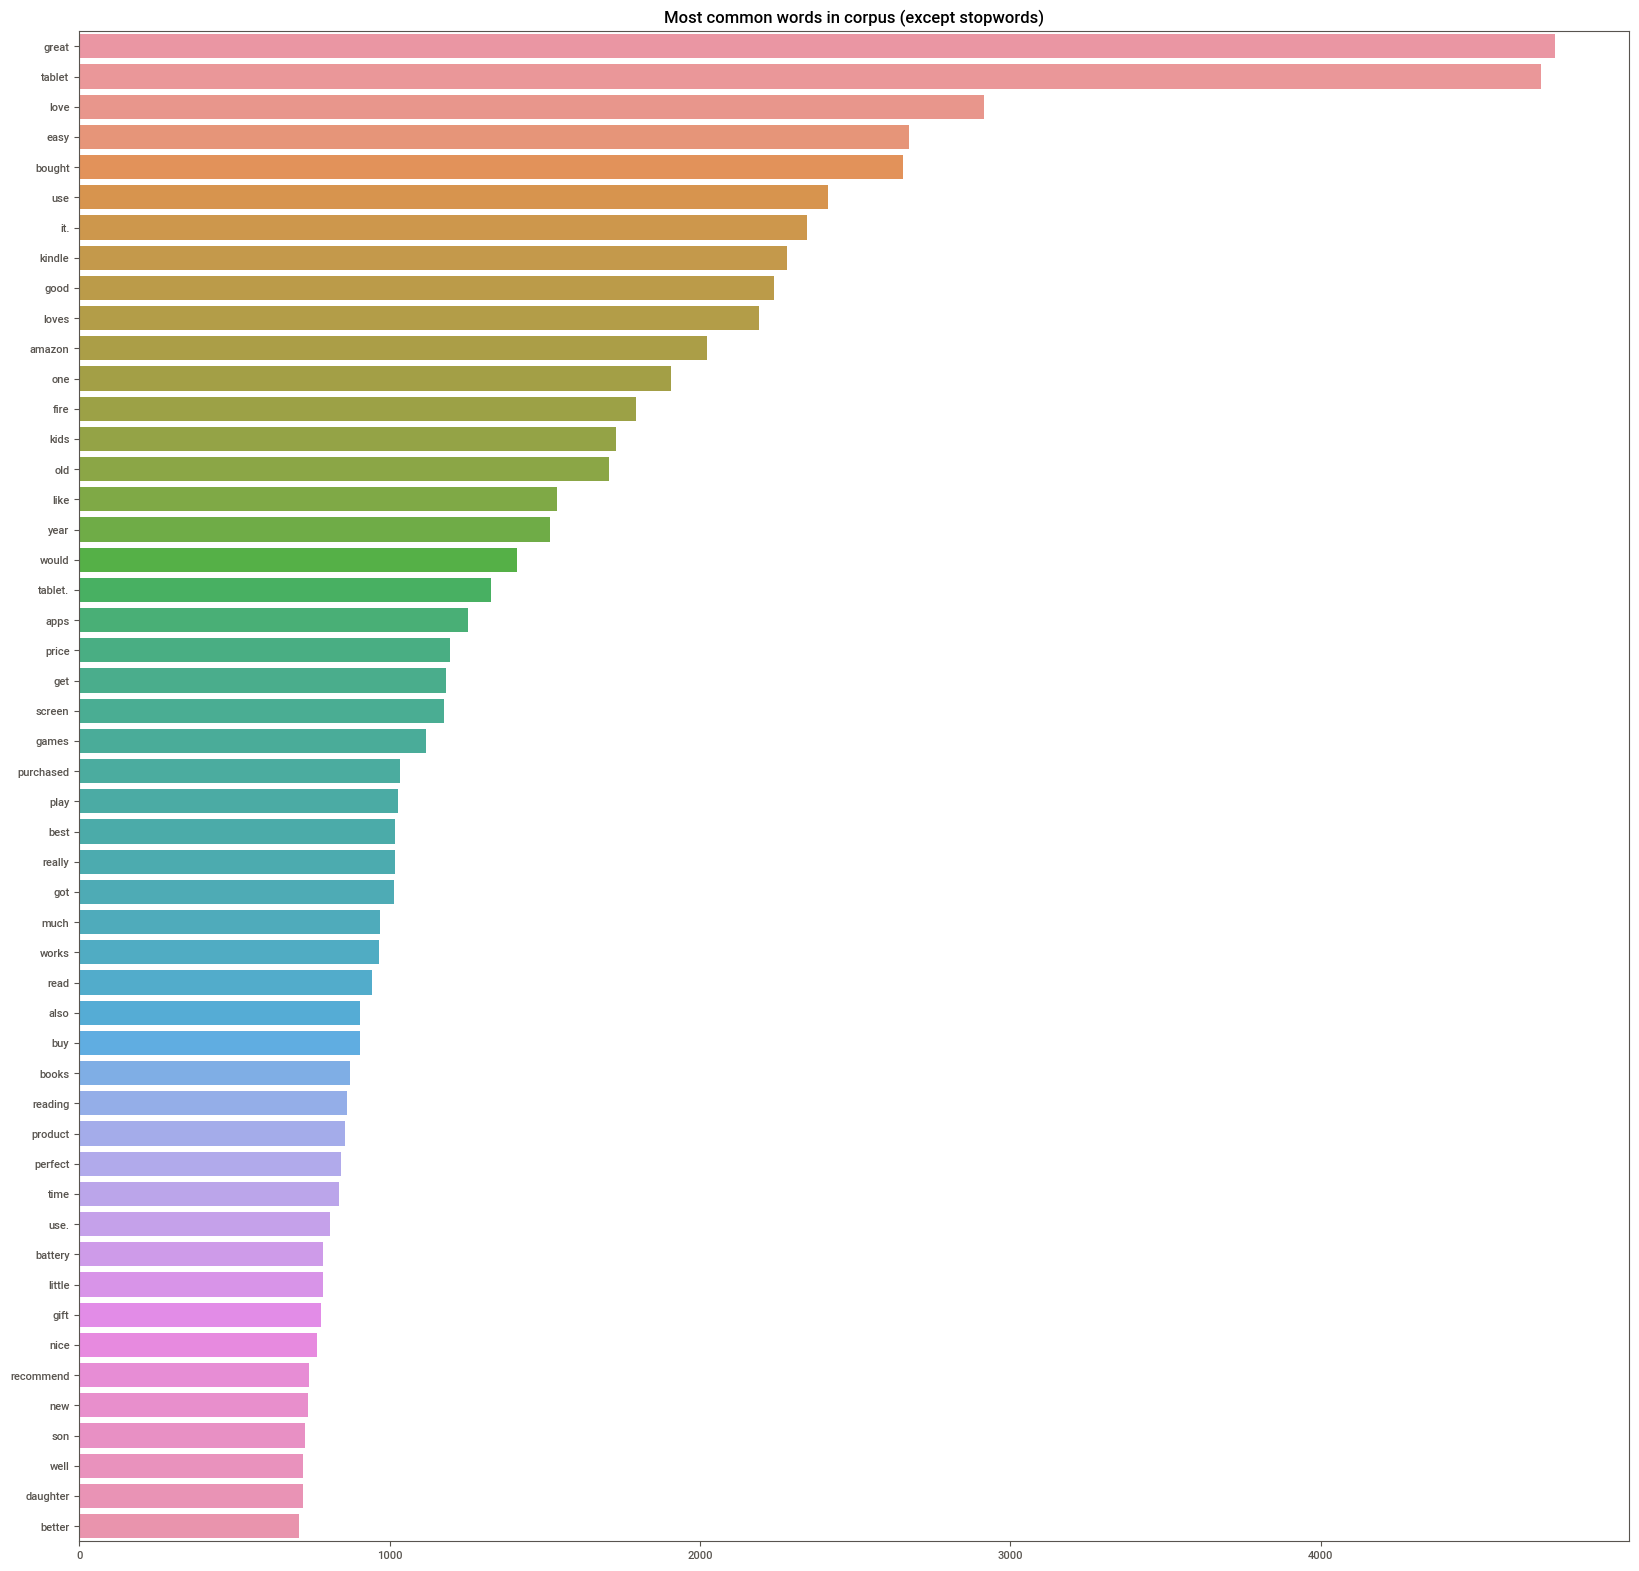

In [37]:
counter = collections.Counter(corpus)
most_common_words = counter.most_common()

x, y= [], []
for word,count in most_common_words[:50]:
    x.append(word)
    y.append(count)

fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(20, 20), dpi=100)
sns.barplot(x=y,y=x)
plt.title('Most common words in corpus (except stopwords)')
plt.show()

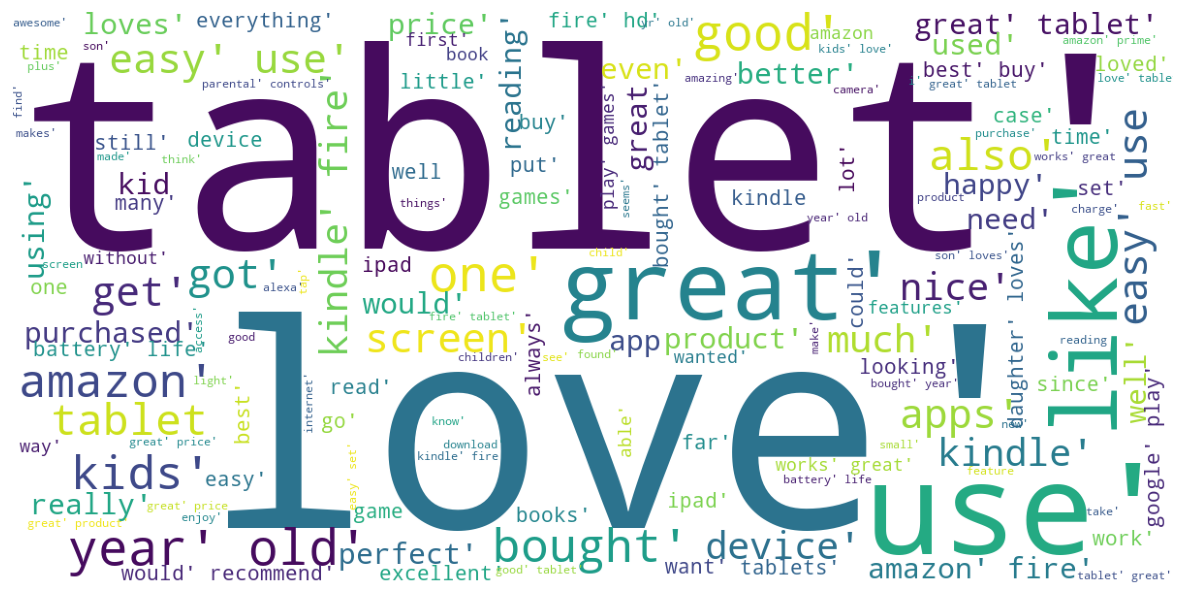

In [38]:
wordcloud = WordCloud(
    background_color='white',
    max_words=150,
    scale=3,
    random_state=1)

wordcloud=wordcloud.generate(str(corpus))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

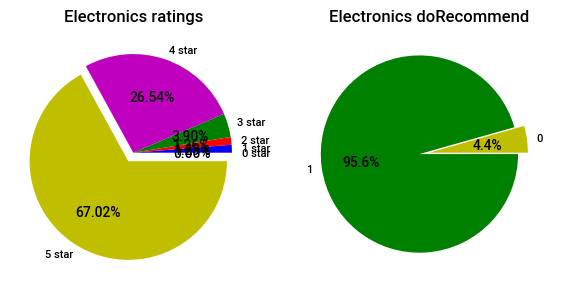

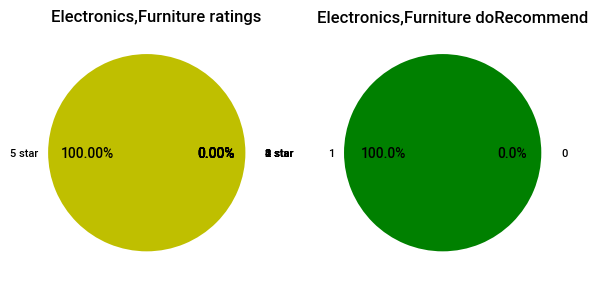

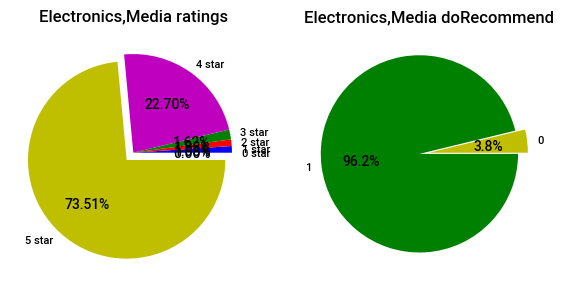

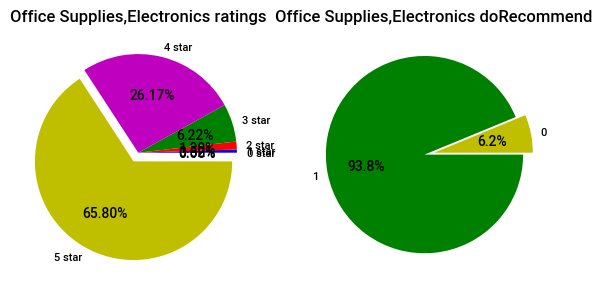

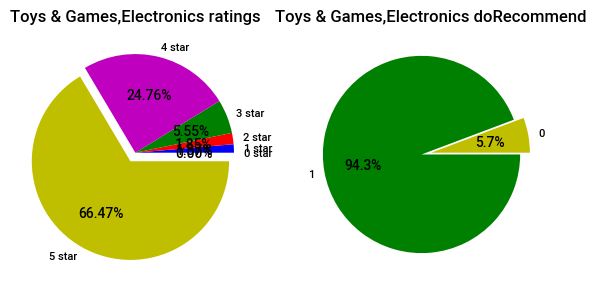

In [39]:
def draw_pie(data,title=None):

    fig = plt.figure(1, figsize=(7, 7))

    count=[]
    labels=[]
    for i in range(max(data['reviews.rating'])+1):
        labels.append(f'{i} star')
        count.append((data['reviews.rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,
            autopct='%1.2f%%')
    plt.title(title)
    
    count=[]
    labels=[]
    for i in range(2):
        labels.append(i)
        count.append((data['reviews.doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],
            autopct='%1.1f%%')
    plt.title(f'{item} doRecommend')

    plt.show()


for item,data in dataDf.groupby('primaryCategories'):
    draw_pie(data, title=f'{item} ratings')

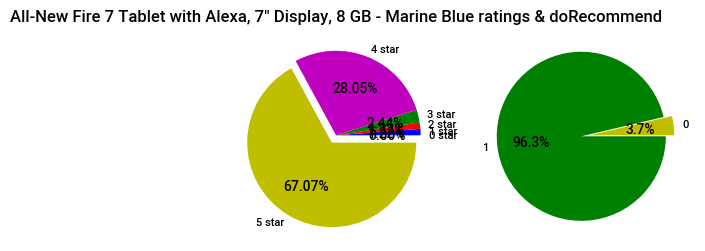

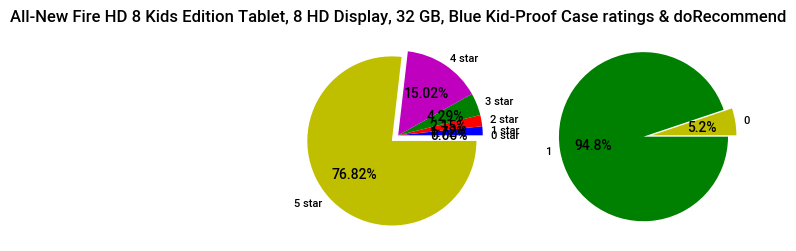

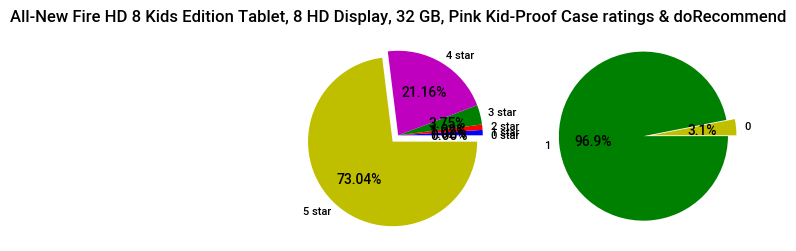

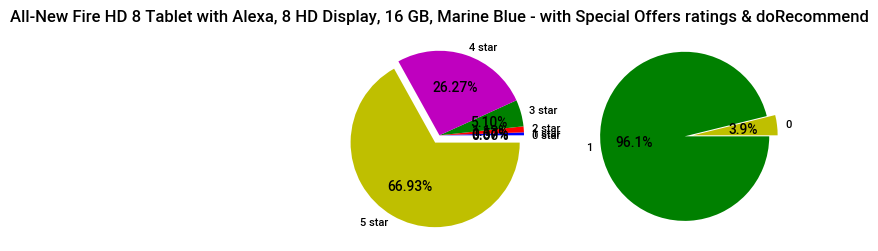

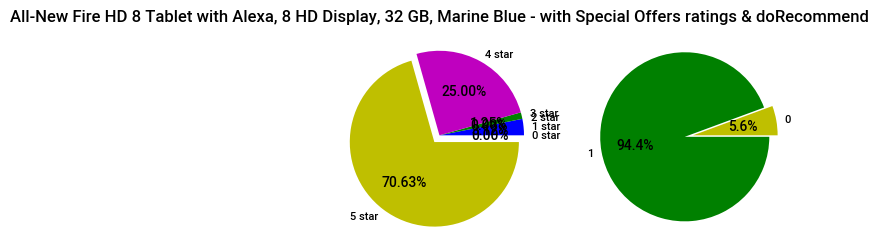

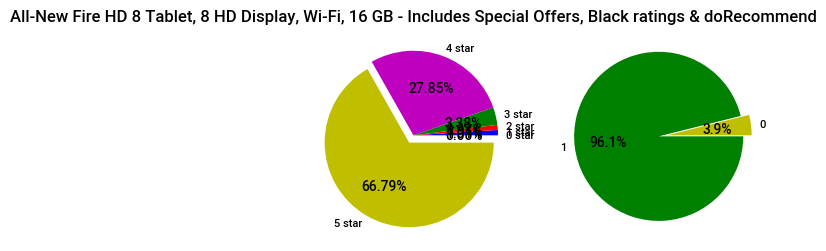

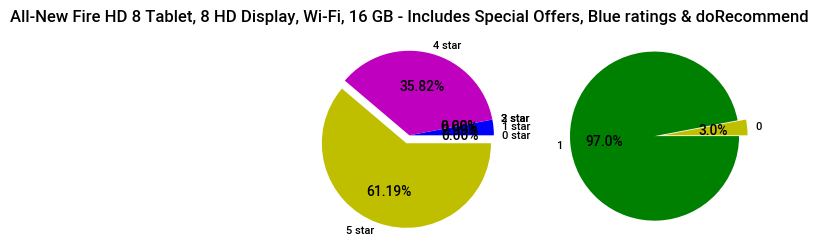

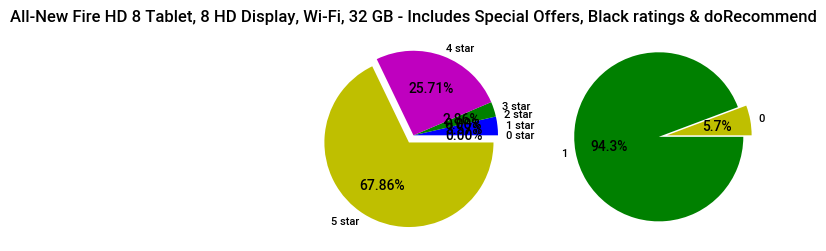

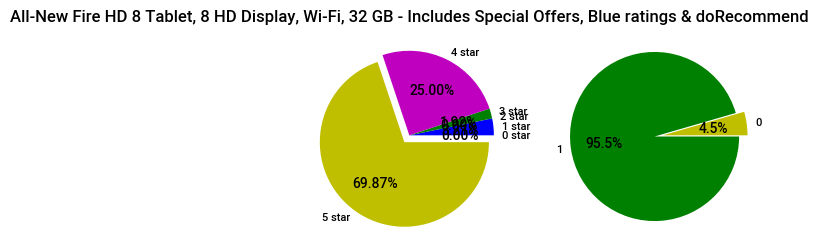

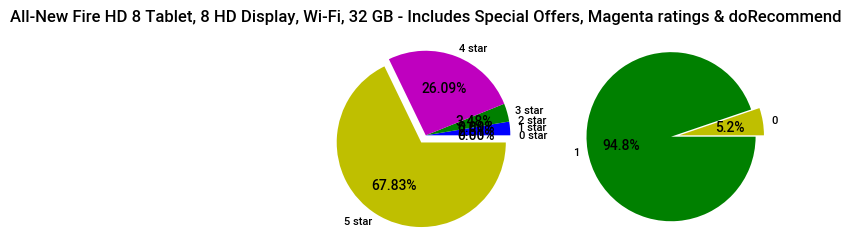

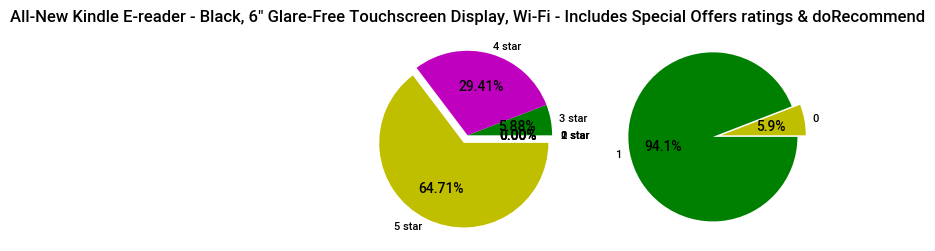

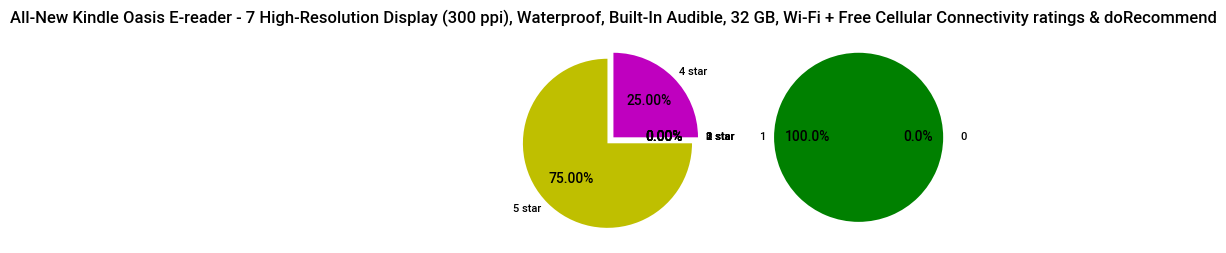

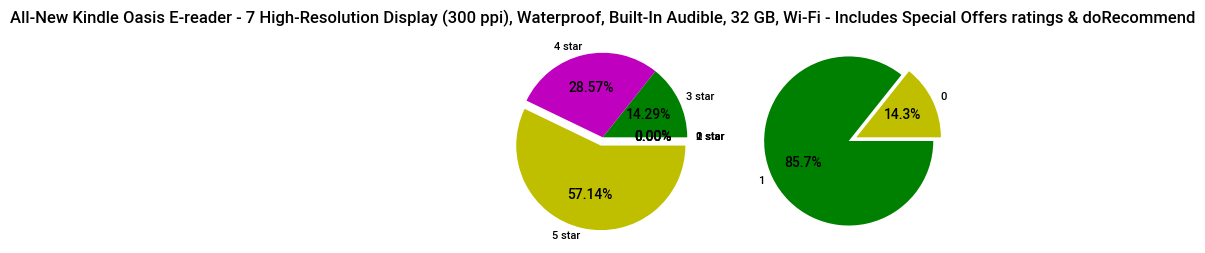

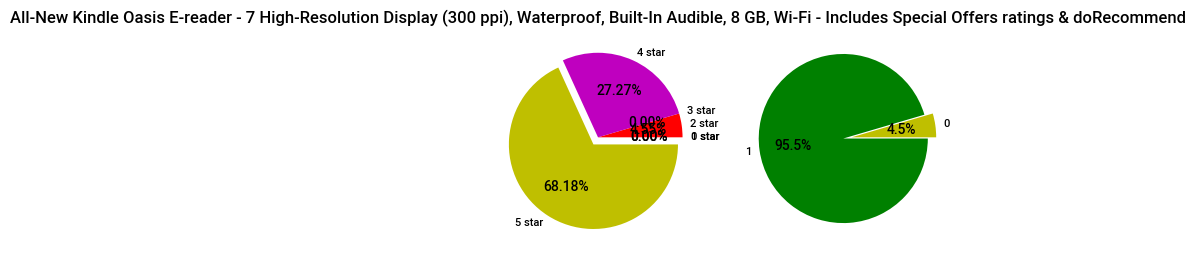

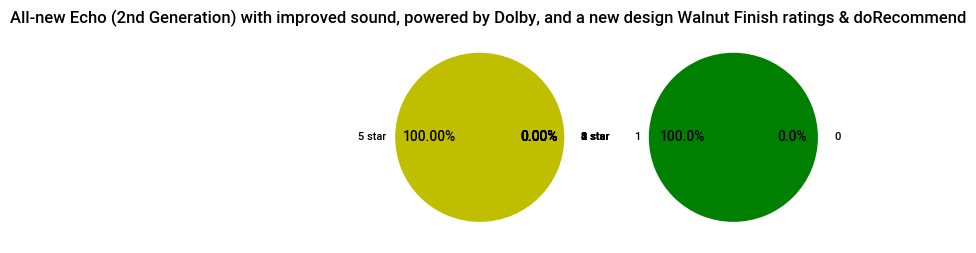

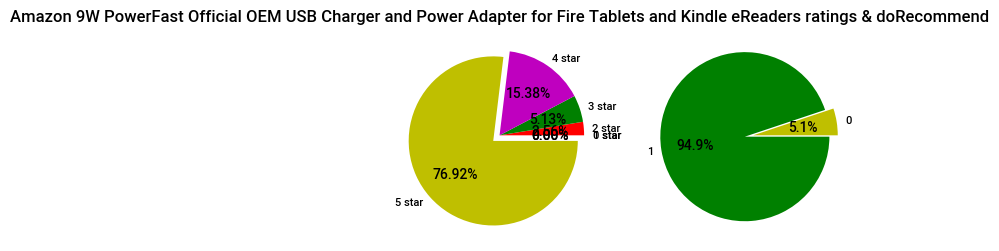

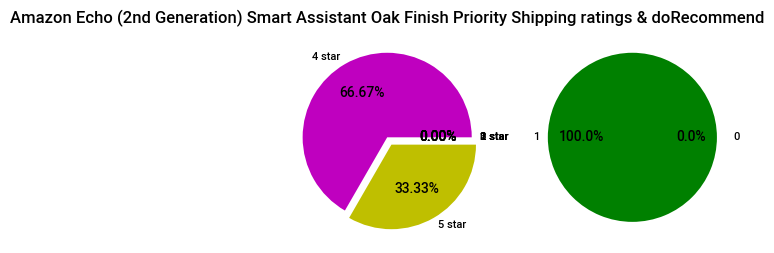

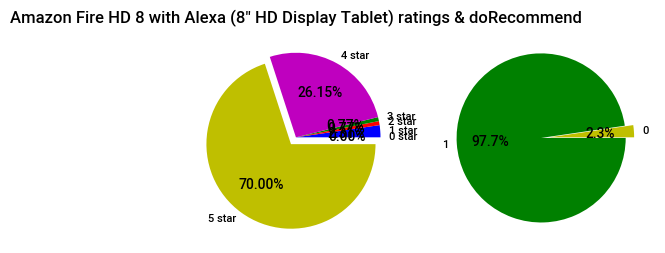

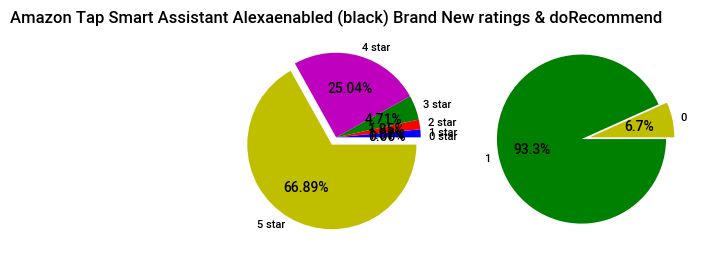

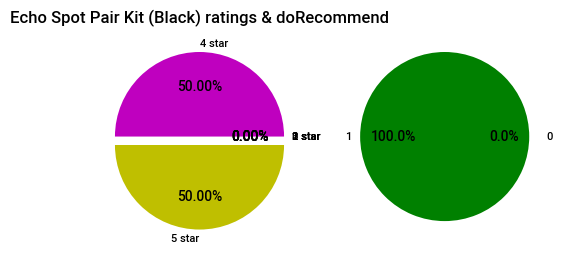

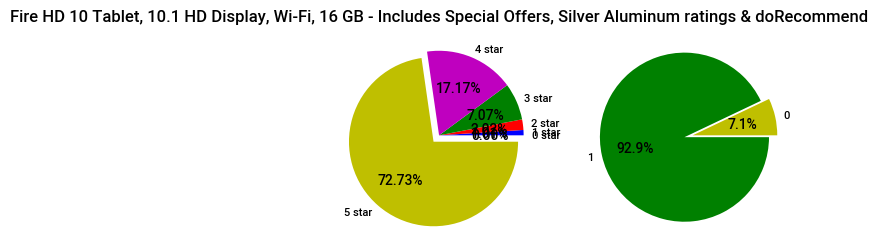

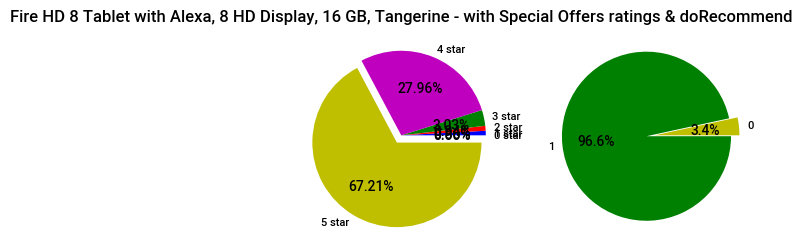

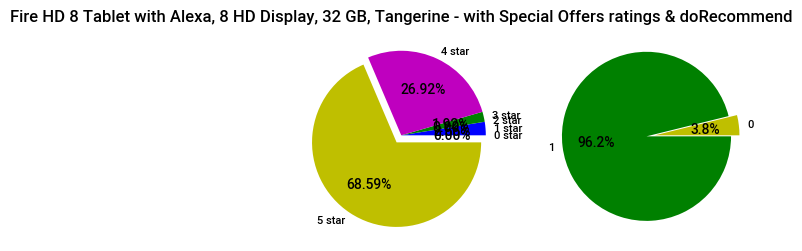

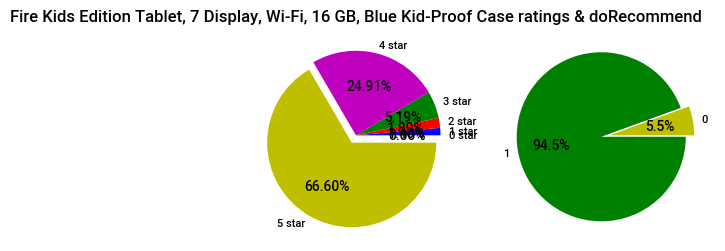

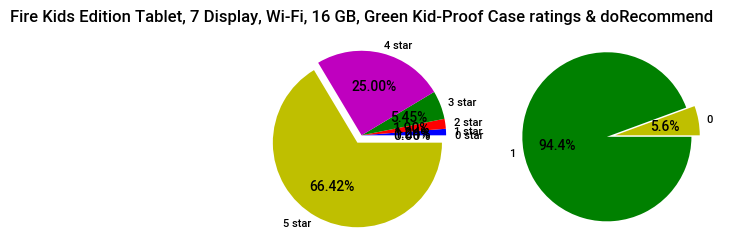

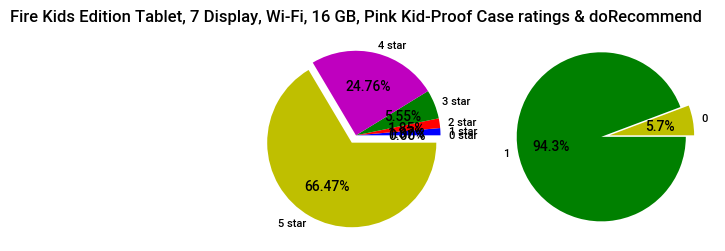

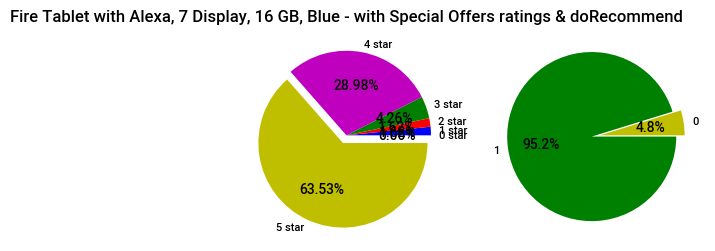

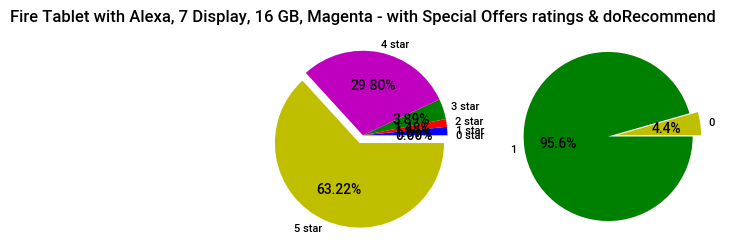

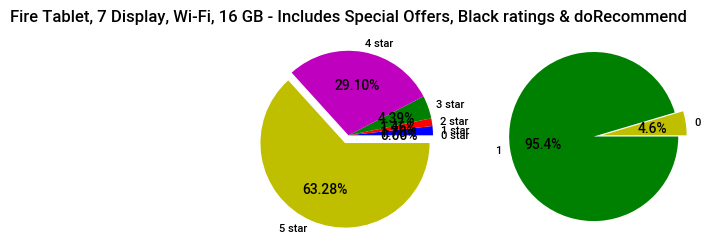

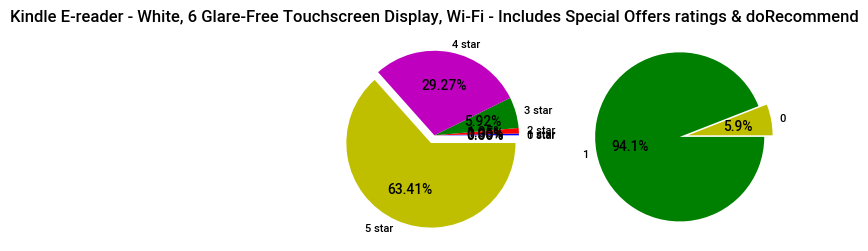

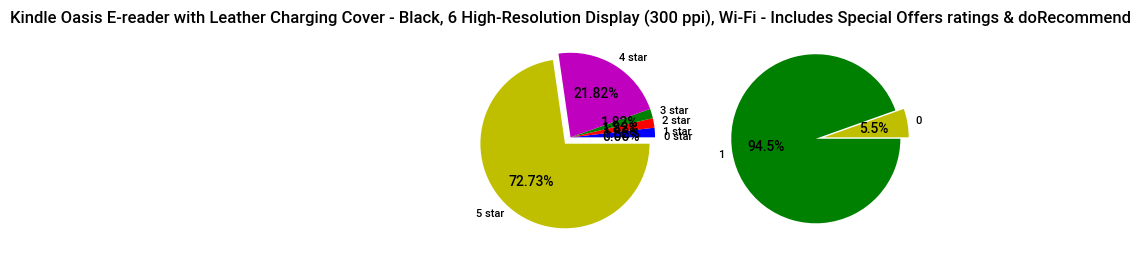

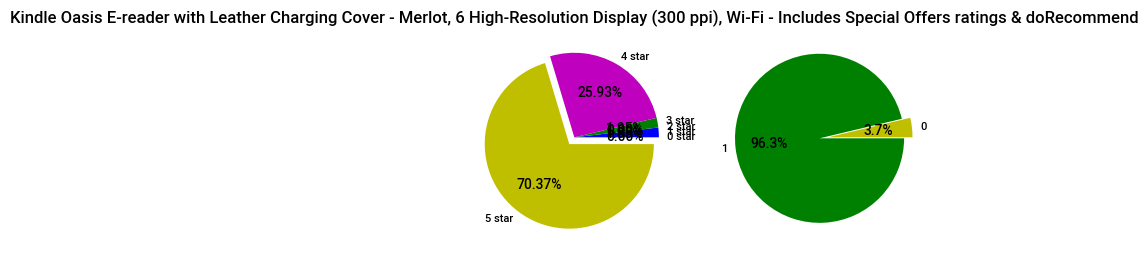

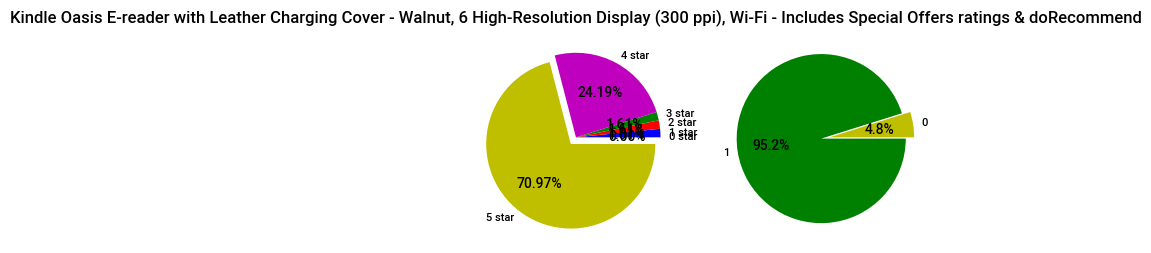

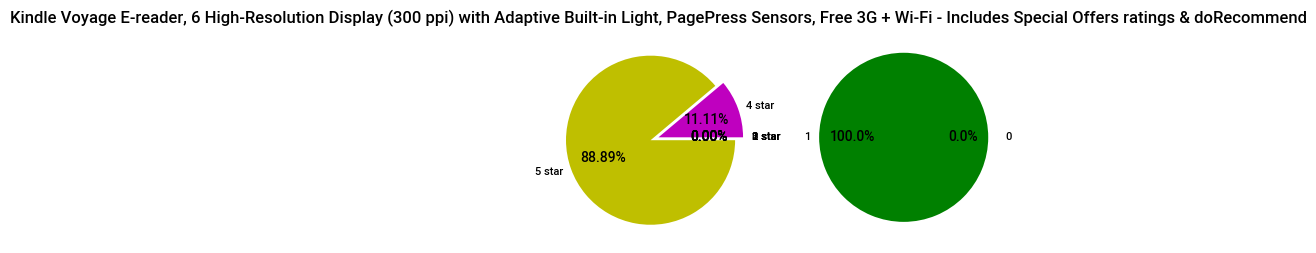

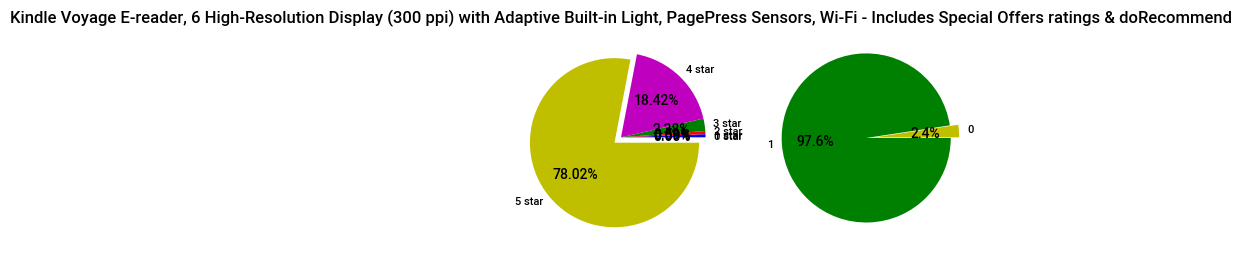

In [40]:
def draw_pie(data,title=None):

    fig = plt.figure(1, figsize=(6, 6))

    count=[]
    labels=[]
    for i in range(max(data['reviews.rating'])+1):
        labels.append(f'{i} star')
        count.append((data['reviews.rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,
            autopct='%1.2f%%')
    plt.title(f'{title} ratings & doRecommend')
    
    count=[]
    labels=[]
    for i in range(2):
        labels.append(i)
        count.append((data['reviews.doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],
            autopct='%1.1f%%')
    plt.show()


for item,data in dataDf.groupby('name'):
    draw_pie(data, title=item)

<a name="2"></a>
## 3 SpaCy
Back to [Table of Contents](#0)

---


In [41]:
# for basic visualizations
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [42]:
#loading english module
nlp = spacy.load('en')

In [43]:
# Reading the file onto Google Colab from GitHub using pandas library
data = pd.read_csv("https://raw.githubusercontent.com/anishmahapatra/amazon-customer-review-nlp/main/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [44]:
#display data
data.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  "Sometimes while playing a game, you can answe...         1  
3  "I have had a lot of fun with this thing. My 4...         1  
4                                              Music         1

In [45]:
#number of rows and columns present in the dataset.
data.shape

(3150, 5)

In [46]:
data["variation"].head()

0    Charcoal Fabric 
1    Charcoal Fabric 
2      Walnut Finish 
3    Charcoal Fabric 
4    Charcoal Fabric 
Name: variation, dtype: object

Let us now analyze the word-level attributes:

In [47]:
txt = data["verified_reviews"][1009]
txt

'Bought this for my daughter when she turned 9.  She loves it!!  I especially like the calling feature since she doesn’t have a cell phone.  She loves playing music and dancing and with Amazon music she can play all her favorite songs ...... sometimes over and over and over again lol!'

In [48]:
data.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [49]:
#to see any null data is there
data.isnull().any().any()

False

In [50]:
doc = nlp(txt)    
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf

Text  StartIndex       Lemma  IsPunctuation  IsSpace WordShape  \
0       Bought           0         buy          False    False     Xxxxx   
1         this           7        this          False    False      xxxx   
2          for          12         for          False    False       xxx   
3           my          16      -PRON-          False    False        xx   
4     daughter          19    daughter          False    False      xxxx   
5         when          28        when          False    False      xxxx   
6          she          33      -PRON-          False    False       xxx   
7       turned          37        turn          False    False      xxxx   
8            9          44           9          False    False         d   
9            .          45           .           True    False         .   
10                      47                      False     True             
11         She          48      -PRON-          False    False       Xxx   
12       loves          52        love          False    False      xxxx   
13          it          58      -PRON-          False    False        xx   
14           !          60           !           True    False         !   
15           !          61           !           True    False         !   
16                      63                      False     True             
17           I          64      -PRON-          False    False         X   
18  especially          66  especially          False    False      xxxx   
19        like          77        like          False    False      xxxx   
20         the          82         the          False    False       xxx   
21     calling          86        call          False    False      xxxx   
22     feature          94     feature          False    False      xxxx   
23       since         102       since          False    False      xxxx   
24         she         108      -PRON-          False    False       xxx   
25        does         112          do          False    False      xxxx   
26         n’t         116         not          False    False       x’x   
27        have         120        have          False    False      xxxx   
28           a         125           a          False    False         x   
29        cell         127        cell          False    False      xxxx   
30       phone         132       phone          False    False      xxxx   
31           .         137           .           True    False         .   
32                     139                      False     True             
33         She         140      -PRON-          False    False       Xxx   
34       loves         144        love          False    False      xxxx   
35     playing         150        play          False    False      xxxx   
36       music         158       music          False    False      xxxx   
37         and         164         and          False    False       xxx   
38     dancing         168     dancing          False    False      xxxx   
39         and         176         and          False    False       xxx   
40        with         180        with          False    False      xxxx   
41      Amazon         185      Amazon          False    False     Xxxxx   
42       music         192       music          False    False      xxxx   
43         she         198      -PRON-          False    False       xxx   
44         can         202         can          False    False       xxx   
45        play         206        play          False    False      xxxx   
46         all         211         all          False    False       xxx   
47         her         215      -PRON-          False    False       xxx   
48    favorite         219    favorite          False    False      xxxx   
49       songs         228        song          False    False      xxxx   
50      ......         234      ......           True    False      ....   
51   sometimes         241   sometimes          False    F

Just calling the function "nlp" on the text column gets us a lot of information. The details are as follows:

- Text - Tokenized word
- StartIndex - Index at which the word starts in the sentence
- Lemma - Lemma of the word (we need not do lemmatization separately)
- IsPunctuation - Whether the given word is a punctuation or not
- IsSpace - Whether the given word is just a white space or not
- WordShape - Gives information about the shape of word (If all letters are in - upper case, we will get XXXXX, if all in lower case then xxxxx, if the first - letter is upper and others lower then Xxxxx and so on)
- PartOfSpeech - Part of speech of the word
- POSTag - Tag for part of speech of word

<a name="3.1"></a>
### 3.1 Named Entity Recognition (NER)
Back to [Table of Contents](#0)

A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product or a book title.

We also get named entity recognition as part of spacy package. It is inbuilt in the english language model and we can also train our own entities if needed.

In [51]:
doc = nlp(txt)
olist = []
for ent in doc.ents:
    olist.append([ent.text, ent.label_])
    
odf = pd.DataFrame(olist)
odf.columns = ["Text", "EntityType"]
odf

Text EntityType
0       9   CARDINAL
1  Amazon        ORG

In [52]:
from spacy import displacy
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
displacy.render(doc, style='ent', jupyter=True)

<a name="3.2"></a>
### 3.2 Dependency Parser
Back to [Table of Contents](#0)

A dependency parser analyzes the grammatical structure of a sentence, establishing relationships between "head" words and words which modify those heads

Spacy can be used to create these dependency parsers which can be used in a variety of tasks.

In [53]:
doc = nlp(data["verified_reviews"][1009])
olist = []
for token in doc:
    olist.append([token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children]])
odf = pd.DataFrame(olist)
odf.columns = ["Text", "Dep", "Head text", "Head POS", "Children"]
odf

Text       Dep Head text Head POS  \
0       Bought      ROOT    Bought     VERB   
1         this      dobj    Bought     VERB   
2          for    dative    Bought     VERB   
3           my      poss  daughter     NOUN   
4     daughter      pobj       for      ADP   
5         when    advmod    turned     VERB   
6          she     nsubj    turned     VERB   
7       turned     advcl    Bought     VERB   
8            9      dobj    turned     VERB   
9            .     punct    Bought     VERB   
10                               .    PUNCT   
11         She     nsubj     loves     VERB   
12       loves      ROOT     loves     VERB   
13          it      dobj     loves     VERB   
14           !     punct     loves     VERB   
15           !     punct     loves     VERB   
16                               !    PUNCT   
17           I     nsubj      like     VERB   
18  especially    advmod      like     VERB   
19        like      ROOT      like     VERB   
20         the       det   feature     NOUN   
21     calling      amod   feature     NOUN   
22     feature      pobj      like     VERB   
23       since      mark      have      AUX   
24         she     nsubj      have      AUX   
25        does       aux      have      AUX   
26         n’t       neg      have      AUX   
27        have     advcl      like     VERB   
28           a       det     phone     NOUN   
29        cell  compound     phone     NOUN   
30       phone      dobj      have      AUX   
31           .     punct      like     VERB   
32                               .    PUNCT   
33         She     nsubj     loves     VERB   
34       loves      ROOT     loves     VERB   
35     playing     xcomp     loves     VERB   
36       music      dobj   playing     VERB   
37         and        cc     music     NOUN   
38     dancing      conj     music     NOUN   
39         and        cc     loves     VERB   
40        with      conj     loves     VERB   
41      Amazon  compound     music     NOUN   
42       music      pobj      with      ADP   
43         she     nsubj      play     VERB   
44         can       aux      play     VERB   
45        play      conj     loves     VERB   
46         all    predet     songs     NOUN   
47         her      poss     songs     NOUN   
48    favorite      amod     songs     NOUN   
49       songs      dobj      play     VERB   
50      ......     punct      play     VERB   
51   sometimes    advmod      over      ADV   
52        over    advmod       lol     VERB   
53         and        cc      over      ADV   
54        over      conj      over      ADV   
55         and        cc      over      ADV   
56        over    advmod     again      ADV   
57       again      conj      over      ADV   
58         lol    advmod     loves     VERB   
59           !     punct     loves     VERB   

                                   Children  
0                    [this, for, turned, .]  
1                                        []  
2                                [daughter]  
3                                        []  
4                                      [my]  
5                                        []  
6                                        []  
7                            [when, she, 9]  
8                                        []  
9                                       [ ]  
10                                       []  
11                                       []  
12                          [She, it, !, !]  
13                                       []  
14                                       []  
15                                      [ ]  
16                                       []  
17                                       []  
18                                       []  
19        [I, especially, feature, have, .]  
20                                       []  
21                                       []  
22                           [the, calling]  
23                                    

- Text: The original token text.
- Dep: The syntactic relation connecting child to head.
- Head text: The original text of the token head.
- Head POS: The part-of-speech tag of the token head.
- Children: The immediate syntactic dependents of the token.

In [54]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

<a name="3.3"></a>
### 3.3 Word Similarity
Back to [Table of Contents](#0)

Spacy has word vector model as well. So we can use the same to find similar words.



In [56]:
nlp = spacy.load('en_core_web_lg')

Now we can use the cosine similarity to find the words that are similar to the word "Love"



In [57]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

love = nlp.vocab['love'].vector
computed_similarities = []
for word in nlp.vocab:
    # Ignore words without vectors
    if not word.has_vector:
        continue
    similarity = cosine_similarity(love, word.vector)
    computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print([w[0].text for w in computed_similarities[:10]])

['love', 'lOve', 'lOVE', 'LOve', 'LOVe', 'LOVE', 'LoVe', 'Love', 'LOVED', 'Loved']


In [58]:
queen = nlp.vocab['love']
happy = nlp.vocab['happy']
fun = nlp.vocab['fun']
kids = nlp.vocab['kids']
king = nlp.vocab['King']
 
print("Word similarity score between love and happy : ",queen.similarity(happy))
print("Word similarity score between love and funn : ",queen.similarity(fun))

Word similarity score between love and happy :  0.68693185
Word similarity score between love and funn :  0.60048425


<a name="3.4"></a>
### 3.4 Data Visualization
Back to [Table of Contents](#0)

In [66]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.6% people have given Alexa 5 Star rating, which is very good. 14.4% people have given Alexa a 4 Star Rating, which is also good. that means 72.6+14.4 = 87% people have given alexa good rating.

4.38% people have given alexa an average rating of 3 stars. 3.05% people did not like alexa and chose to give only 2 star ratings to alexa whereas 5.11% people hated alexa and decided to give alexa only 1 Star Rating. This a total of 3.05+5.11 = 8.16% people did not like alexa.

In [60]:
feedbacks = data['feedback'].value_counts()

label_feedback = feedbacks.index
size_feedback = feedbacks.values

colors = ['yellow', 'lightgreen']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]

layout = go.Layout(title = 'Distribution of Feedbacks for Alexa')

fig = go.Figure(data = df2,layout = layout)

py.iplot(fig)

Here again we are going to analyze the Pie Chart representing the Distribution of feedback for Amazon Alexa which says that around 92% people gave a positive feedback to Amazon Alexa and only 8% people gave negative feedback to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people and only few people did not like it for some unforeseeable factors.

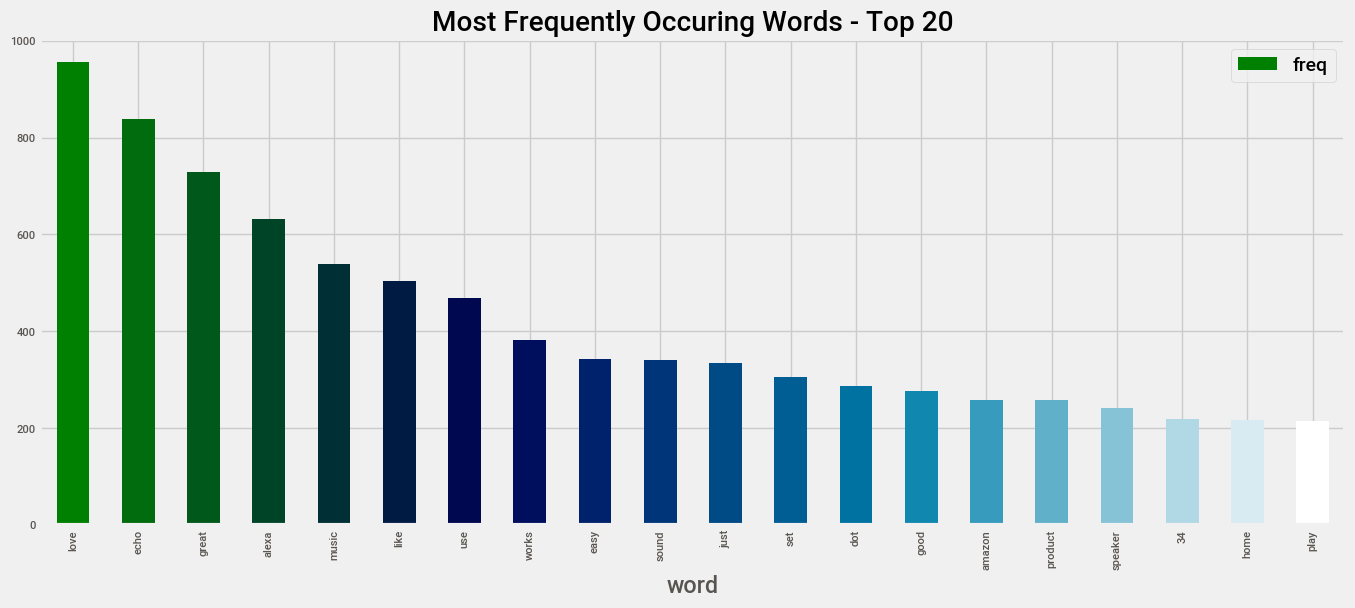

In [61]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

The Above Bar plot represents the most frequnt words in the reviews so that we can get a rough idea about the reviews and what people think of the product.

We can see that love is the most frequent word in the word suggesting that most of the people absolutely love alexa. Other frequent words that suggest alexa is doing well are amazing, like, great, works etc.

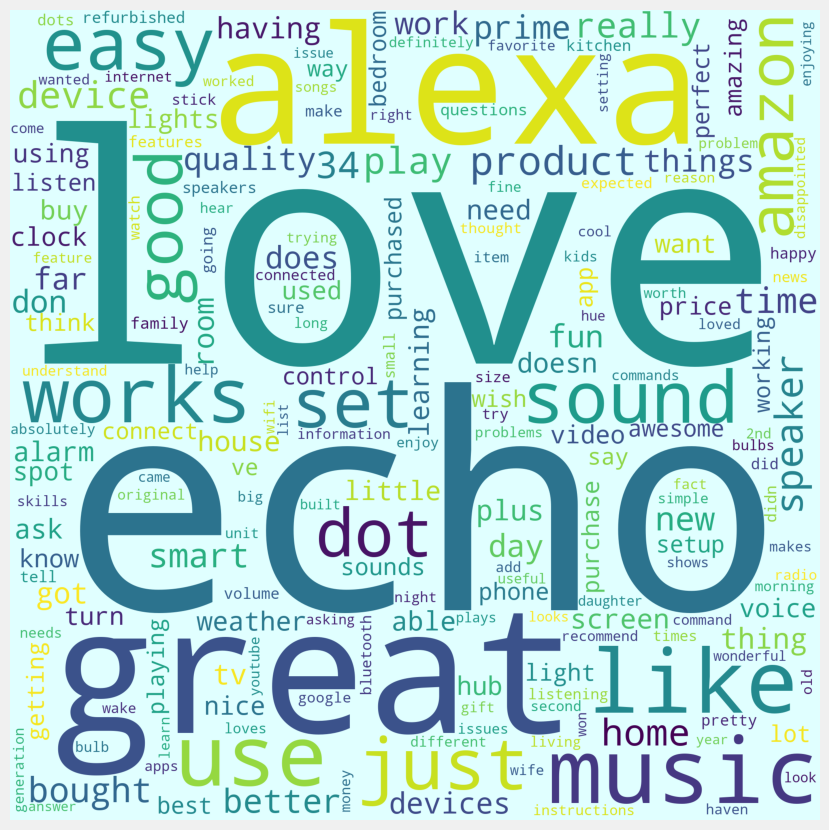

In [62]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

#plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
#plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

Plotting a wordscloud for the Words to see all the words, The Larger the words the larger is the frequency for that word.



In [63]:
data['length'] = data['verified_reviews'].apply(len)

data.groupby('length').describe().sample(10)

rating                                              feedback            \
        count      mean       std  min  25%  50%  75%  max    count      mean   
length                                                                          
299       1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0      1.0  1.000000   
118       8.0  4.500000  0.925820  3.0  4.5  5.0  5.0  5.0      8.0  1.000000   
346       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0      1.0  1.000000   
582       1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0      1.0  1.000000   
439       1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0      1.0  1.000000   
56       18.0  4.666667  0.685994  3.0  5.0  5.0  5.0  5.0     18.0  1.000000   
2         4.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      4.0  1.000000   
94        8.0  4.625000  1.060660  2.0  5.0  5.0  5.0  5.0      8.0  0.875000   
247       4.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0      4.0  1.000000   
279       3.0  4.000000  1.732051  2.0  3.5  5.0  5.0  5.0      3.0  0.666667   

                                           
             std  min  25%  50%  75%  max  
length                                     
299          NaN  1.0  1.0  1.0  1.0  1.0  
118     0.000000  1.0  1.0  1.0  1.0  1.0  
346          NaN  1.0  1.0  1.0  1.0  1.0  
582          NaN  1.0  1.0  1.0  1.0  1.0  
439          NaN  1.0  1.0  1.0  1.0  1.0  
56      0.000000  1.0  1.0  1.0  1.0  1.0  
2       0.000000  1.0  1.0  1.0  1.0  1.0  
94      0.353553  0.0  1.0  1.0  1.0  1.0  
247     0.000000  1.0  1.0  1.0  1.0  1.0  
279     0.577350  0.0  0.5  1.0  1.0  1.0

In [64]:
trace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'Viridis',
    )
)
df = [trace]

layout = go.Layout(
    title = 'feedback vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data = df, layout = layout)
iplot(fig)

<a name="2"></a>
## 2 NGram
Back to [Table of Contents](#0)

---
